## EXERCISE 1: Search of the best C

Create a SVM with linear kernel using the scikit-learn library.

Verify the performance with different values of the hyperparameter C using the function [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html): range -20:0:20 (i.e., start=-20, stop = 0, num=20) on digits dataset.

> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset.

> __QUESTION 1(b):__ Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis ((mean and standard deviation). Suggestion: Use the log-scale.

> __QUESTION 1(c):__ Train and test the model on the digits dataset with the best configuration found at the previous step


> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset.

In [1]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

digits_data = datasets.load_digits()
print(digits_data.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Flatten the images to train the model

In [12]:
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))

C possible values generation with np.logspace

In [13]:
C_values = np.logspace(-20, 0, 20)

Iteration to get the best values of C

In [16]:
mean_scores = []
std_scores = []

for C in C_values:
    clf = svm.SVC(kernel='linear', C=C), #(gamma = 0.001)
    scores = cross_val_score(clf, data, digits_data.target, cv=3)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

So, the best C will be

In [17]:
best_index = np.argmax(mean_scores)
best_C = C_values[best_index]
print("Miglior parametro C:", best_C)
print("Punteggio medio:", mean_scores[best_index])

Miglior parametro C: 0.0006951927961775591
Punteggio medio: 0.9460211463550361


QUESTION 1(b): Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis ((mean and standard deviation). Suggestion: Use the log-scale.

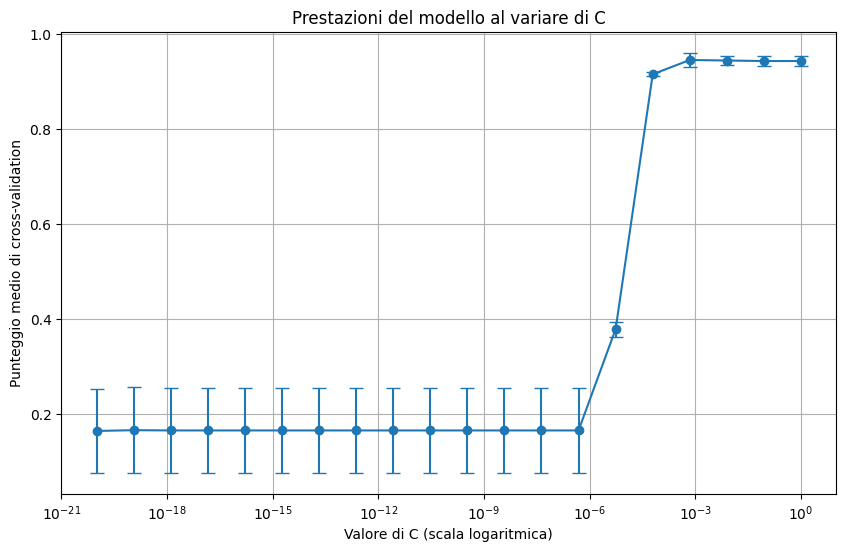

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_scores, yerr=std_scores, fmt='o-', capsize=5)

plt.xscale('log')  # Scala logaritmica per i valori di C
plt.xlabel("Valore di C (scala logaritmica)")
plt.ylabel("Punteggio medio di cross-validation")
plt.title("Prestazioni del modello al variare di C")
plt.grid(True)
plt.show()

The best C calculated (≈0.000695) is located at the transition point before the scores reach the plateau. This happens because the model optimized the mean cross-validation score, which may be slightly before the plateau region.

QUESTION 1(c): Train and test the model on the digits dataset with the best configuration found at the previous step

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, digits_data.target, test_size=0.25, shuffle=False
)

best_C = 0.0006951927961775591
clf_best = svm.SVC(kernel='linear', C=best_C)
clf_best.fit(X_train, y_train)

test_score = clf_best.score(X_test, y_test)
print("Accuratezza sul test set con il miglior C:", test_score)

Accuratezza sul test set con il miglior C: 0.9288888888888889


## EXERCISE 2: SVM on the iris_dataset

Load the iris dataset from the dataset available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

> __QUESTION 2(a):__  Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset.

> __QUESTION 2(b):__ Split the dataset in training and test according to the following percentages: 70% - 30%

> __QUESTION 2(c):__ Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

> __QUESTION 2(d):__ Test the achieved models on the test set

> __QUESTION 2(e):__ Represent the performances achieved for each kernel in the form of confusion matrix


QUESTION 2(a): Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset.

In [26]:
iris_data = datasets.load_iris()
print(iris_data.data)
print(iris_data.data.shape)
print(np.unique(iris_data.target))
print(iris_data.target.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

QUESTION 2(b): Split the dataset in training and test according to the following percentages: 70% - 30%

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.3, shuffle=True, random_state=42
)

QUESTION 2(c): Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

In [42]:
# creating the SVM classificators
linear = svm.SVC(kernel='linear')
rbf = svm.SVC(kernel='rbf')
poly = svm.SVC(kernel='poly')

# training
linear.fit(X_train, y_train)
rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)

SVC(kernel='poly')

QUESTION 2(d): Test the achieved models on the test set

In [51]:
kernels = ['linear', 'rbf', 'poly']

# Addestramento e valutazione
for kernel in kernels:
    # Creazione del classificatore SVM con kernel specifico
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Accuratezza sul training set
    train_score = clf.score(X_train, y_train)

    # Accuratezza sul test set
    test_score = clf.score(X_test, y_test)

    print(f"Kernel: {kernel}")
    print(f"  Accuracy on training set: {train_score:.4f}")
    print(f"  Accuracy on test set: {test_score:.4f}")

Kernel: linear
  Accuracy on training set: 0.9714
  Accuracy on test set: 1.0000
Kernel: rbf
  Accuracy on training set: 0.9619
  Accuracy on test set: 1.0000
Kernel: poly
  Accuracy on training set: 0.9810
  Accuracy on test set: 0.9778


QUESTION 2(e): Represent the performances achieved for each kernel in the form of confusion matrix

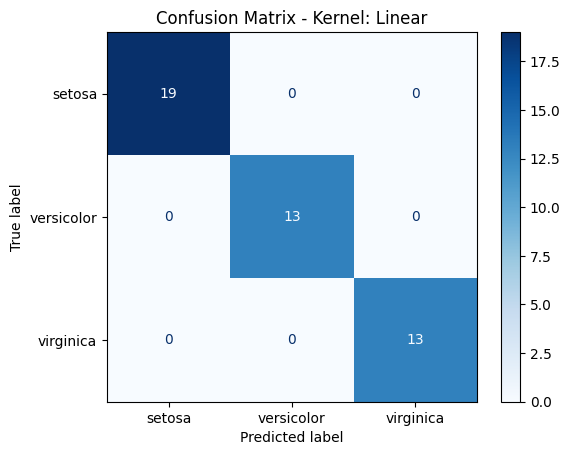

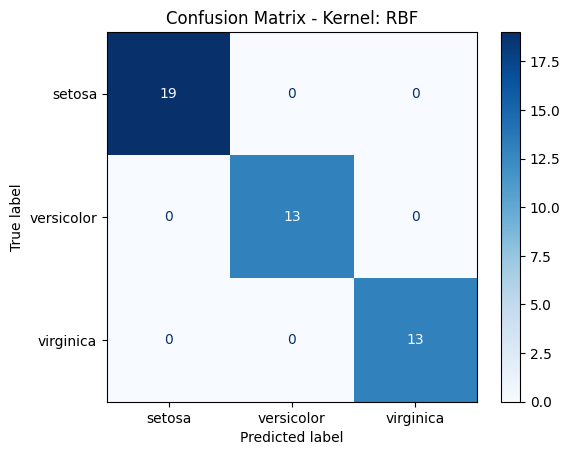

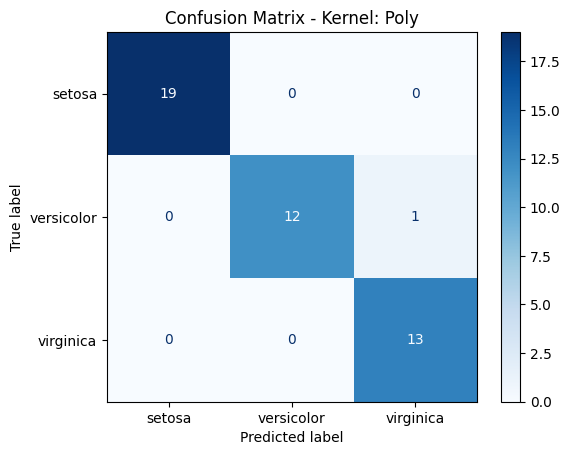

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predizioni sui dati di test per ciascun modello
y_pred_linear = linear.predict(X_test)
y_pred_rbf = rbf.predict(X_test)
y_pred_poly = poly.predict(X_test)

# Creazione e visualizzazione delle matrici di confusione
kernels = ['Linear', 'RBF', 'Poly']
y_preds = [y_pred_linear, y_pred_rbf, y_pred_poly]

for kernel, y_pred in zip(kernels, y_preds):
    # Calcola la matrice di confusione
    cm = confusion_matrix(y_test, y_pred)

    # Visualizza la matrice di confusione
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Kernel: {kernel}")
    plt.show()
